In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -qq /content/drive/MyDrive/fruit/test.zip  -d /content/drive/MyDrive/fruit/test

In [ ]:
!unzip -qq /content/drive/MyDrive/fruit/train.zip -d /content/drive/MyDrive/fruit/train/

In [ ]:
path="/content/drive/MyDrive/fruit/train_label.csv"

file = open( path, 'w')

for  i in  range(1, 501):
    file.write( str(1) + '\n') # 레몬
for i  in  range(501, 1201):                       
    file.write( str(0) + '\n') # 바나나

file.close()

In [ ]:
path="/content/drive/MyDrive/fruit/test_label.csv"

file = open( path, 'w')

for  i in  range(1, 51):
    file.write( str(1) + '\n') # 레몬
for i  in  range(51, 101):                       
    file.write( str(0) + '\n') # 바나나

file.close()

In [ ]:
import os
import re
import cv2
import numpy as np

def image_load(path):
    file_list = os.listdir(path)
    file_name=[]

    for  i  in  file_list:
        a = int( re.sub('[^0-9]','', i) )   # i 가 숫자가 아니면 null 로 변경해라 ~
        file_name.append(a)
    file_name.sort() # 정렬작업 
    
    file_res=[]
    for  j  in  file_name:
        file_res.append('%s/%d.jpg' %(path,j) )
        
    image=[]
    for  k  in  file_res:
        img = cv2.imread(k)
        image.append(img)
    
    return  np.array(image)

In [ ]:
import csv

def  label_load(path):
    file = open(path)
    labeldata = csv.reader(file)
    labellist = []
    for  i  in  labeldata:
        labellist.append(int(i[0]))

    return   np.array(labellist)

In [ ]:
import  cv2
import  os 
import  numpy  as np

path = "/content/drive/MyDrive/fruit/train/"
file_list = os.listdir(path)   # 파일이름 불러오는 부분 

for k in file_list:     # 리스트안에 있는 파일들을 하나씩 빼내는 코드 
    img = cv2.imread(path + '/' + k) # 사진을 숫자행렬로 변경합니다. 
                                                   # (165, 201, 3)     
    width, height = img.shape[:2]  # 사진 숫자 행렬에서 가로,세로 가져온다.
    resize_img = cv2.resize(img, (32 , 32), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('/content/drive/MyDrive/fruit/train_resize/' + k, resize_img)   # resize 한 이미지를 저장합니 
  

In [ ]:
# 폴더 삭제 명령어
import shutil
shutil.rmtree('/content/drive/MyDrive/furit/')

In [ ]:
import  cv2
import  os 
import  numpy  as np

path = "/content/drive/MyDrive/fruit/test/"
file_list = os.listdir(path)   # 파일이름 불러오는 부분 

for k in file_list:     # 리스트안에 있는 파일들을 하나씩 빼내는 코드 
    img = cv2.imread(path + '/' + k) # 사진을 숫자행렬로 변경합니다. 
                                                   # (165, 201, 3)     
    width, height = img.shape[:2]  # 사진 숫자 행렬에서 가로,세로 가져온다.
    resize_img = cv2.resize(img, (32 , 32), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('/content/drive/MyDrive/fruit/test_resize/' + k, resize_img)   # resize 한 이미지를 저장합니 
    

In [ ]:
# 1. 의자와 테이블 데이터를 불러옵니다.

# 이미지 데이터와 라벨위치 
train_image = '/content/drive/MyDrive/fruit/train_resize/'
test_image = '/content/drive/MyDrive/fruit/test_resize/'
train_label = '/content/drive/MyDrive/fruit/train_label.csv'
test_label = '/content/drive/MyDrive/fruit/test_label.csv'

# 데이터 로드 
x_train = image_load(train_image)
y_train = label_load(train_label)
x_test = image_load(test_image)
y_test = label_load(test_label)     

print(x_train.shape) # (1200, 32, 32, 3)
print(x_test.shape) # (100, 32, 32, 3)
print(y_train.shape) # (1200,)
print(y_test.shape) # (100,)

(1200, 32, 32, 3)
(100, 32, 32, 3)
(1200,)
(100,)


In [ ]:
# 드롭아웃 적용하기

# 1. 필요한 패키지 가져오는 코드 

import tensorflow as tf   # 텐써 플로우 2.0 
from tensorflow.keras.datasets.mnist import load_data  # 텐써플로우에 내장되어있는 
                                                                         # mnist 데이터를 가져온다.
from tensorflow.keras.models import Sequential  # 모델을 구성하기 위한 모듈
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D ,Flatten# 완전 연결계층을 구성하기 위한 모듈
from tensorflow.keras.utils import to_categorical # one encoding 하는 모듈

tf.random.set_seed(777)

    
# 2. 정규화 진행  
x_train = x_train.reshape(-1, 32, 32, 3) / 255  # 4차원으로 변경합니다. 
x_test = x_test.reshape(-1, 32,32, 3) / 255

# 3. 정답 데이터를 준비한다. 
# 하나의 숫자를 one hot encoding 한다. (예:  4 ---> 0 0 0 0 1 0 0 0 0 0 ) 
y_train = to_categorical(y_train)  # 훈련 데이터의 라벨(정답)을 원핫 인코딩
y_test = to_categorical(y_test)    # 테스트 데이터의 라벨(정답)을 원핫 인코딩 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1200, 32, 32, 3)
(100, 32, 32, 3)
(1200, 2)
(100, 2)


Train on 1200 samples, validate on 100 samples
Epoch 1/200
1100/1200 [==========================>...] - ETA: 0s - loss: 0.9816 - acc: 0.5118

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1200/1200 [==============================] - 1s 1ms/sample - loss: 0.9748 - acc: 0.5117 - val_loss: 0.6970 - val_acc: 0.5000
Epoch 2/200
1200/1200 [==============================] - 0s 406us/sample - loss: 0.8474 - acc: 0.5783 - val_loss: 0.6860 - val_acc: 0.5000
Epoch 3/200
1200/1200 [==============================] - 0s 397us/sample - loss: 0.8207 - acc: 0.6050 - val_loss: 0.6931 - val_acc: 0.5600
Epoch 4/200
1200/1200 [==============================] - 0s 387us/sample - loss: 0.7940 - acc: 0.5983 - val_loss: 0.7258 - val_acc: 0.5000
Epoch 5/200
1200/1200 [==============================] - 0s 401us/sample - loss: 0.7522 - acc: 0.6417 - val_loss: 0.8079 - val_acc: 0.5000
Epoch 6/200
1200/1200 [==============================] - 0s 391us/sample - loss: 0.7015 - acc: 0.6725 - val_loss: 0.8937 - val_acc: 0.5000
Epoch 7/200
1200/1200 [==============================] - 0s 392us/sample - loss: 0.7138 - acc: 0.6508 - val_loss: 1.0655 - val_acc: 0.5000
Epoch 8/200
1200/1200 [==================

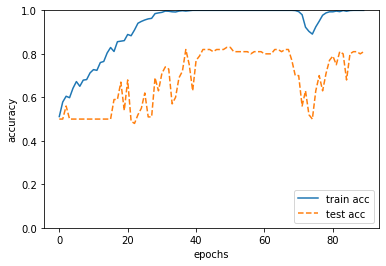

In [ ]:
# 드롭아웃 적용하기

# 1. 필요한 패키지 가져오는 코드 

import tensorflow as tf   # 텐써 플로우 2.0 
from tensorflow.keras.datasets.mnist import load_data  # 텐써플로우에 내장되어있는 
                                                                         # mnist 데이터를 가져온다.
from tensorflow.keras.models import Sequential  # 모델을 구성하기 위한 모듈
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D ,Flatten# 완전 연결계층을 구성하기 위한 모듈
from tensorflow.keras.utils import to_categorical # one encoding 하는 모듈
import numpy as  np

tf.random.set_seed(777)


# 4. 모델을 구성합니다. 3층 신경망으로 구성
model = Sequential()
model.add( Conv2D(100, kernel_size=(5,5),input_shape=(32,32,3), activation='relu', padding='same') )
model.add(BatchNormalization())
model.add( MaxPooling2D(pool_size=(2, 2), padding='same') )
model.add( Conv2D(100, kernel_size=(5,5), activation='relu', padding='same') )
model.add(BatchNormalization())
model.add( MaxPooling2D(pool_size=(2, 2), padding='same') )
model.add( Conv2D(100, kernel_size=(5,5), activation='relu', padding='same') )
model.add(BatchNormalization())
model.add( MaxPooling2D(pool_size=(2, 2), padding='same') )
model.add( Flatten() )
model.add(Dense(100, activation = 'relu', input_shape = (32*32, )))  # 1층
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation = 'relu') ) # 2층 은닉층 
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))  # 3층 출력층 

# 5. 모델을 설정합니다. ( 경사하강법, 오차함수를 정의해줍니다. )
model.compile(optimizer='Adam', 
                     loss = 'binary_crossentropy', 
                     metrics=['acc'])  # 학습과정에서 정확도를 보려고 

#6. 모델을 훈련시킵니다. 
from tensorflow.keras.callbacks import EarlyStopping

# 콜백을 정의합니다.
callbacks = [EarlyStopping(monitor = 'val_acc', patience = 40, verbose = 1)]

# callbacks 인자를 통해 정의한 콜백을 전달합니다.
history= model.fit(x_train, y_train,
         batch_size = 100,
         validation_data = (x_test, y_test),
         epochs = 200, 
         callbacks = callbacks)

# 7.모델을 평가합니다. (오차, 정확도가 출력됩니다.)
model.evaluate(x_test, y_test)

train_acc_list=history.history['acc']
train_acc_list

test_acc_list=history.history['val_acc']
test_acc_list

import  matplotlib.pyplot  as  plt

x = np.arange( len(train_acc_list) )
plt.plot( x, train_acc_list, label='train acc')
plt.plot( x, test_acc_list, label='test acc',  linestyle='--')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

model.save('/content/drive/MyDrive/fruit/fruit_model2.h5')

In [ ]:
# 모델을 불러와서 새로운 모델로 구성하고 이파리 이미지 한장 예측하기

# 1. 모델을 불러옵니다.
from tensorflow.keras.models import load_model

new_model = load_model('/content/drive/MyDrive/fruit/fruit_model2.h5')

# 2.모델을 평가합니다. (오차, 정확도가 출력됩니다.)

new_model.evaluate(x_test, y_test)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


[0.7898420715332031, 0.81]

In [ ]:
import tensorflow as  tf
import cv2

img_path = '/content/drive/MyDrive/fruit/img/13.jpg'

#ff = np.fromfile(img_path, np.uint8)# 사진을 숫자행렬로 변경합니다. 
#img = cv2.imdecode(ff, cv2.IMREAD_UNCHANGED)  # (165, 201, 3)   
img = cv2.imread(img_path)
img = cv2.bitwise_not(img)
print(img.shape)

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

resized_images=tf.image.resize_images(img, (32, 32))
print(resized_images.shape)

(225, 225, 3)
(32, 32, 3)


In [ ]:
import numpy as np

x2 =tf.reshape(resized_images, [-1,32,32,3])
print(x2.shape)

from tensorflow.keras.models import load_model

new_model = load_model('/content/drive/MyDrive/fruit/fruit_model2.h5')

results = new_model.predict(x2,steps=1)
np.argmax(results)  # 1 이 레몬, 0 이 바나나

(1, 32, 32, 3)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1

In [ ]:
import tensorflow as  tf
import cv2

img_path = '/content/drive/MyDrive/fruit/img/503.jpg'

img = cv2.imread(img_path)
#img = cv2.bitwise_not(img)
print(img.shape)

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

resized_images2=tf.image.resize_images(img, (32, 32))
print(resized_images2.shape)

(183, 275, 3)
(32, 32, 3)


In [ ]:
import numpy as np

x2 =tf.reshape(resized_images, [-1,32,32,3])
print(x2.shape)

from tensorflow.keras.models import load_model

new_model = load_model('/content/drive/MyDrive/fruit/fruit_model2.h5')

results = new_model.predict(x2,steps=1)
np.argmax(results) # 1 이 파이애플, 0 이 사과

(1, 32, 32, 3)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0

# vgg 적용


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1. 의자와 테이블 데이터를 불러옵니다.

# 이미지 데이터와 라벨위치 
train_image = '/content/drive/MyDrive/fruit/train_resize/'
test_image = '/content/drive/MyDrive/fruit/test_resize/'
train_label = '/content/drive/MyDrive/fruit/train_label.csv'
test_label = '/content/drive/MyDrive/fruit/test_label.csv'

# 데이터 로드 
x_train = image_load(train_image)
y_train = label_load(train_label)
x_test = image_load(test_image)
y_test = label_load(test_label)     

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1200, 32, 32, 3)
(100, 32, 32, 3)
(1200,)
(100,)


In [ ]:
#vgg 추가
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(weights = 'imagenet', input_shape = (32, 32, 3), include_top = False)
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
# 드롭아웃 적용하기

# 1. 필요한 패키지 가져오는 코드 

import tensorflow as tf   # 텐써 플로우 2.0 
from tensorflow.keras.datasets.mnist import load_data  # 텐써플로우에 내장되어있는 
                                                                         # mnist 데이터를 가져온다.
from tensorflow.keras.models import Sequential  # 모델을 구성하기 위한 모듈
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D ,Flatten# 완전 연결계층을 구성하기 위한 모듈
from tensorflow.keras.utils import to_categorical # one encoding 하는 모듈
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(777)

    
# 2. 정규화 진행  
x_train = x_train.reshape(-1, 32, 32, 3) / 255  # 4차원으로 변경합니다. 
x_test = x_test.reshape(-1, 32,32, 3) / 255

# 3. 정답 데이터를 준비한다. 
# 하나의 숫자를 one hot encoding 한다. (예:  4 ---> 0 0 0 0 1 0 0 0 0 0 ) 
y_train = to_categorical(y_train)  # 훈련 데이터의 라벨(정답)을 원핫 인코딩
y_test = to_categorical(y_test)    # 테스트 데이터의 라벨(정답)을 원핫 인코딩 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1200, 32, 32, 3)
(100, 32, 32, 3)
(1200, 2)
(100, 2)


Epoch 1/200
12/12 [==============================] - 13s 143ms/step - loss: 0.9391 - acc: 0.5700 - val_loss: 0.6378 - val_acc: 0.6700
Epoch 2/200
12/12 [==============================] - 1s 110ms/step - loss: 0.7390 - acc: 0.6700 - val_loss: 1.1016 - val_acc: 0.5000
Epoch 3/200
12/12 [==============================] - 1s 113ms/step - loss: 0.6148 - acc: 0.7525 - val_loss: 0.5177 - val_acc: 0.8500
Epoch 4/200
12/12 [==============================] - 1s 111ms/step - loss: 0.5259 - acc: 0.7942 - val_loss: 0.4718 - val_acc: 0.8100
Epoch 5/200
12/12 [==============================] - 1s 113ms/step - loss: 0.4652 - acc: 0.8142 - val_loss: 1.3946 - val_acc: 0.5100
Epoch 6/200
12/12 [==============================] - 1s 111ms/step - loss: 0.4057 - acc: 0.8517 - val_loss: 0.4083 - val_acc: 0.8000
Epoch 7/200
12/12 [==============================] - 1s 110ms/step - loss: 0.3986 - acc: 0.8517 - val_loss: 0.3152 - val_acc: 0.8700
Epoch 8/200
12/12 [==============================] - 1s 111ms/step -

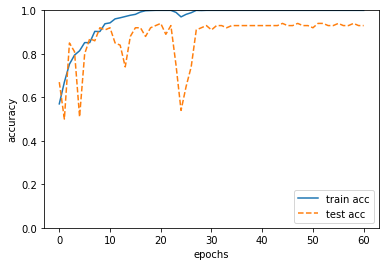

In [ ]:
# 드롭아웃 적용하기

# 1. 필요한 패키지 가져오는 코드 

import tensorflow as tf   # 텐써 플로우 2.0 
from tensorflow.keras.datasets.mnist import load_data  # 텐써플로우에 내장되어있는 
                                                                         # mnist 데이터를 가져온다.
from tensorflow.keras.models import Sequential  # 모델을 구성하기 위한 모듈
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D ,Flatten# 완전 연결계층을 구성하기 위한 모듈
from tensorflow.keras.utils import to_categorical # one encoding 하는 모듈
import numpy as  np

tf.random.set_seed(777)


# 4. 모델을 구성합니다. 3층 신경망으로 구성
model = Sequential()

model.add(vgg16)

model.add( Flatten() )
model.add(Dense(100, activation = 'relu', input_shape = (32*32, )))  # 1층
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation = 'relu') ) # 2층 은닉층 
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))  # 3층 출력층 

# 5. 모델을 설정합니다. ( 경사하강법, 오차함수를 정의해줍니다. )
model.compile(optimizer=Adam(1e-4) , 
                     loss = 'binary_crossentropy', 
                     metrics=['acc'])  # 학습과정에서 정확도를 보려고 

#6. 모델을 훈련시킵니다. 
from tensorflow.keras.callbacks import EarlyStopping

# 콜백을 정의합니다.
callbacks = [EarlyStopping(monitor = 'val_acc', patience = 40, verbose = 1)]

# callbacks 인자를 통해 정의한 콜백을 전달합니다.
history= model.fit(x_train, y_train,
         batch_size = 100,
         validation_data = (x_test, y_test),
         epochs = 200, 
         callbacks = callbacks)

# 7.모델을 평가합니다. (오차, 정확도가 출력됩니다.)
model.evaluate(x_test, y_test)

train_acc_list=history.history['acc']
train_acc_list

test_acc_list=history.history['val_acc']
test_acc_list

import  matplotlib.pyplot  as  plt

x = np.arange( len(train_acc_list) )
plt.plot( x, train_acc_list, label='train acc')
plt.plot( x, test_acc_list, label='test acc',  linestyle='--')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

model.save('/content/drive/MyDrive/fruit/fruit_model_vgg.h5')